# Desafío Regularización

## Daniela Hurtado

#### Descripción

* En esta ocasión utilizaremos datos de la composición química de muestras de vino.
* Nuestro propósito será tratar de predecir su calidad a partir de su composición química.
* Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    * Identifique el tipo de datos de cada columna.
    * Identifique outliers univariados y multivariados. Los primeros los puede       encontrar realizando boxplots de cada atributo, los segundos estudiando         los scatterplot entre pares de atributos.
    * Encuentre la cantidad de valores faltantes en cada columna.
    * Grafique la distribución empírica de cada atributo.

## Ejercicio 1: Preparación del Ambiente de Trabajo

* Importe las librerías básicas
* Importe los métodos asociados a regularización
* Importe la base de datos

In [1]:
# Importamos las librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-darkgrid')

from sklearn.preprocessing import StandardScaler #Estandariza matrices de atributos
from sklearn.model_selection import train_test_split # Matrices de entrenamiento y validación
from sklearn.metrics import  r2_score, mean_squared_error, median_absolute_error# Métricas de desempeño

# Importamos los métodos asociados a la regularización
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from cv_error import *

In [2]:
# Importamos nuestra base de datos
df = pd.read_csv('winequality-red.csv')

## Ejercicio 2: Análisis exploratorio

* Identifique el tipo de datos de cada columna.
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

#### Explorando base de datos

In [3]:
# identificamos tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Observamos primeras 5 lineas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Estadísticas descriptivas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Exploramos las columnas
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# dimensiones de la data (fila x columna)
df.shape

(1599, 12)

### outliers univariados

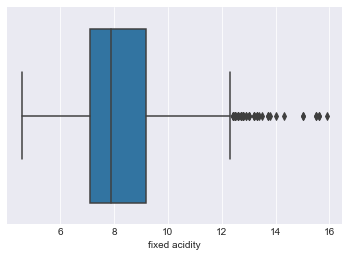

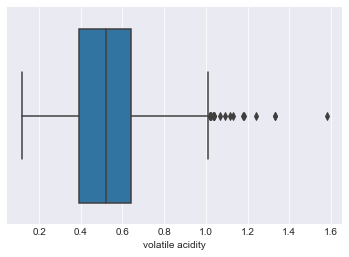

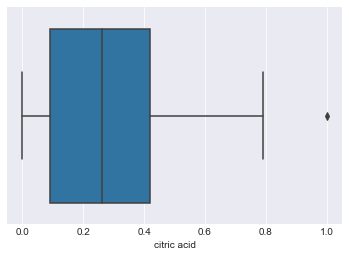

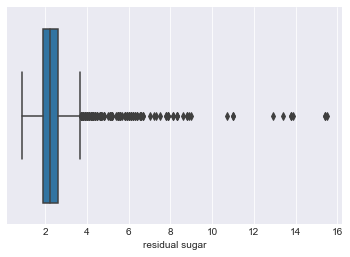

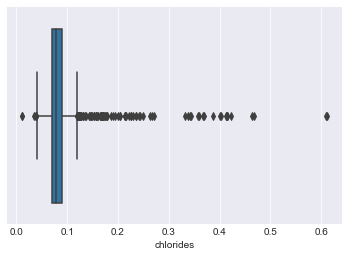

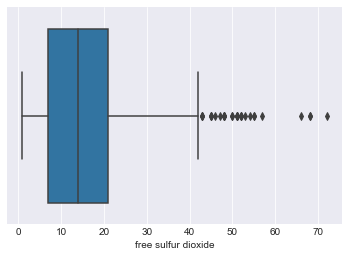

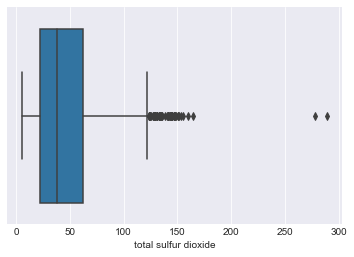

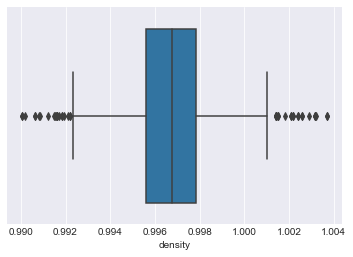

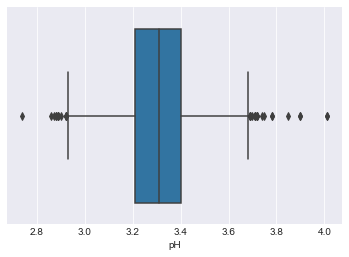

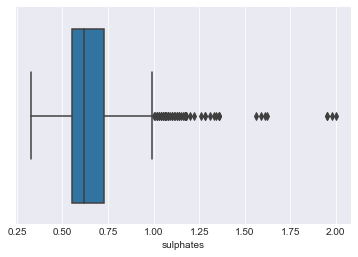

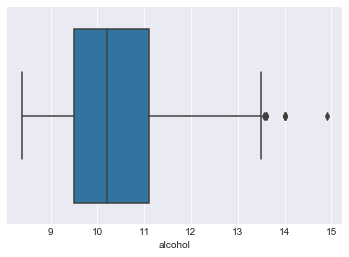

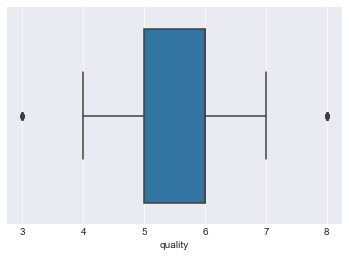

In [8]:
def boxplot(dataframe,variable):
    sns.boxplot(x=dataframe[variable])
    plt.show()
    
for i in df.columns:
    boxplot(df,i)
    

_La variables que presentan una menor cantidad de outliers son: quality, alcohol, citric acid. Todas las demas presentan una gran cantidad de outliers en especial residual sugar, chlorides y sulphates. Estos indican una gran cantidad de valores discrepantes que se escapan de los bordes._

### outliers multivariados

<Figure size 1440x1152 with 0 Axes>

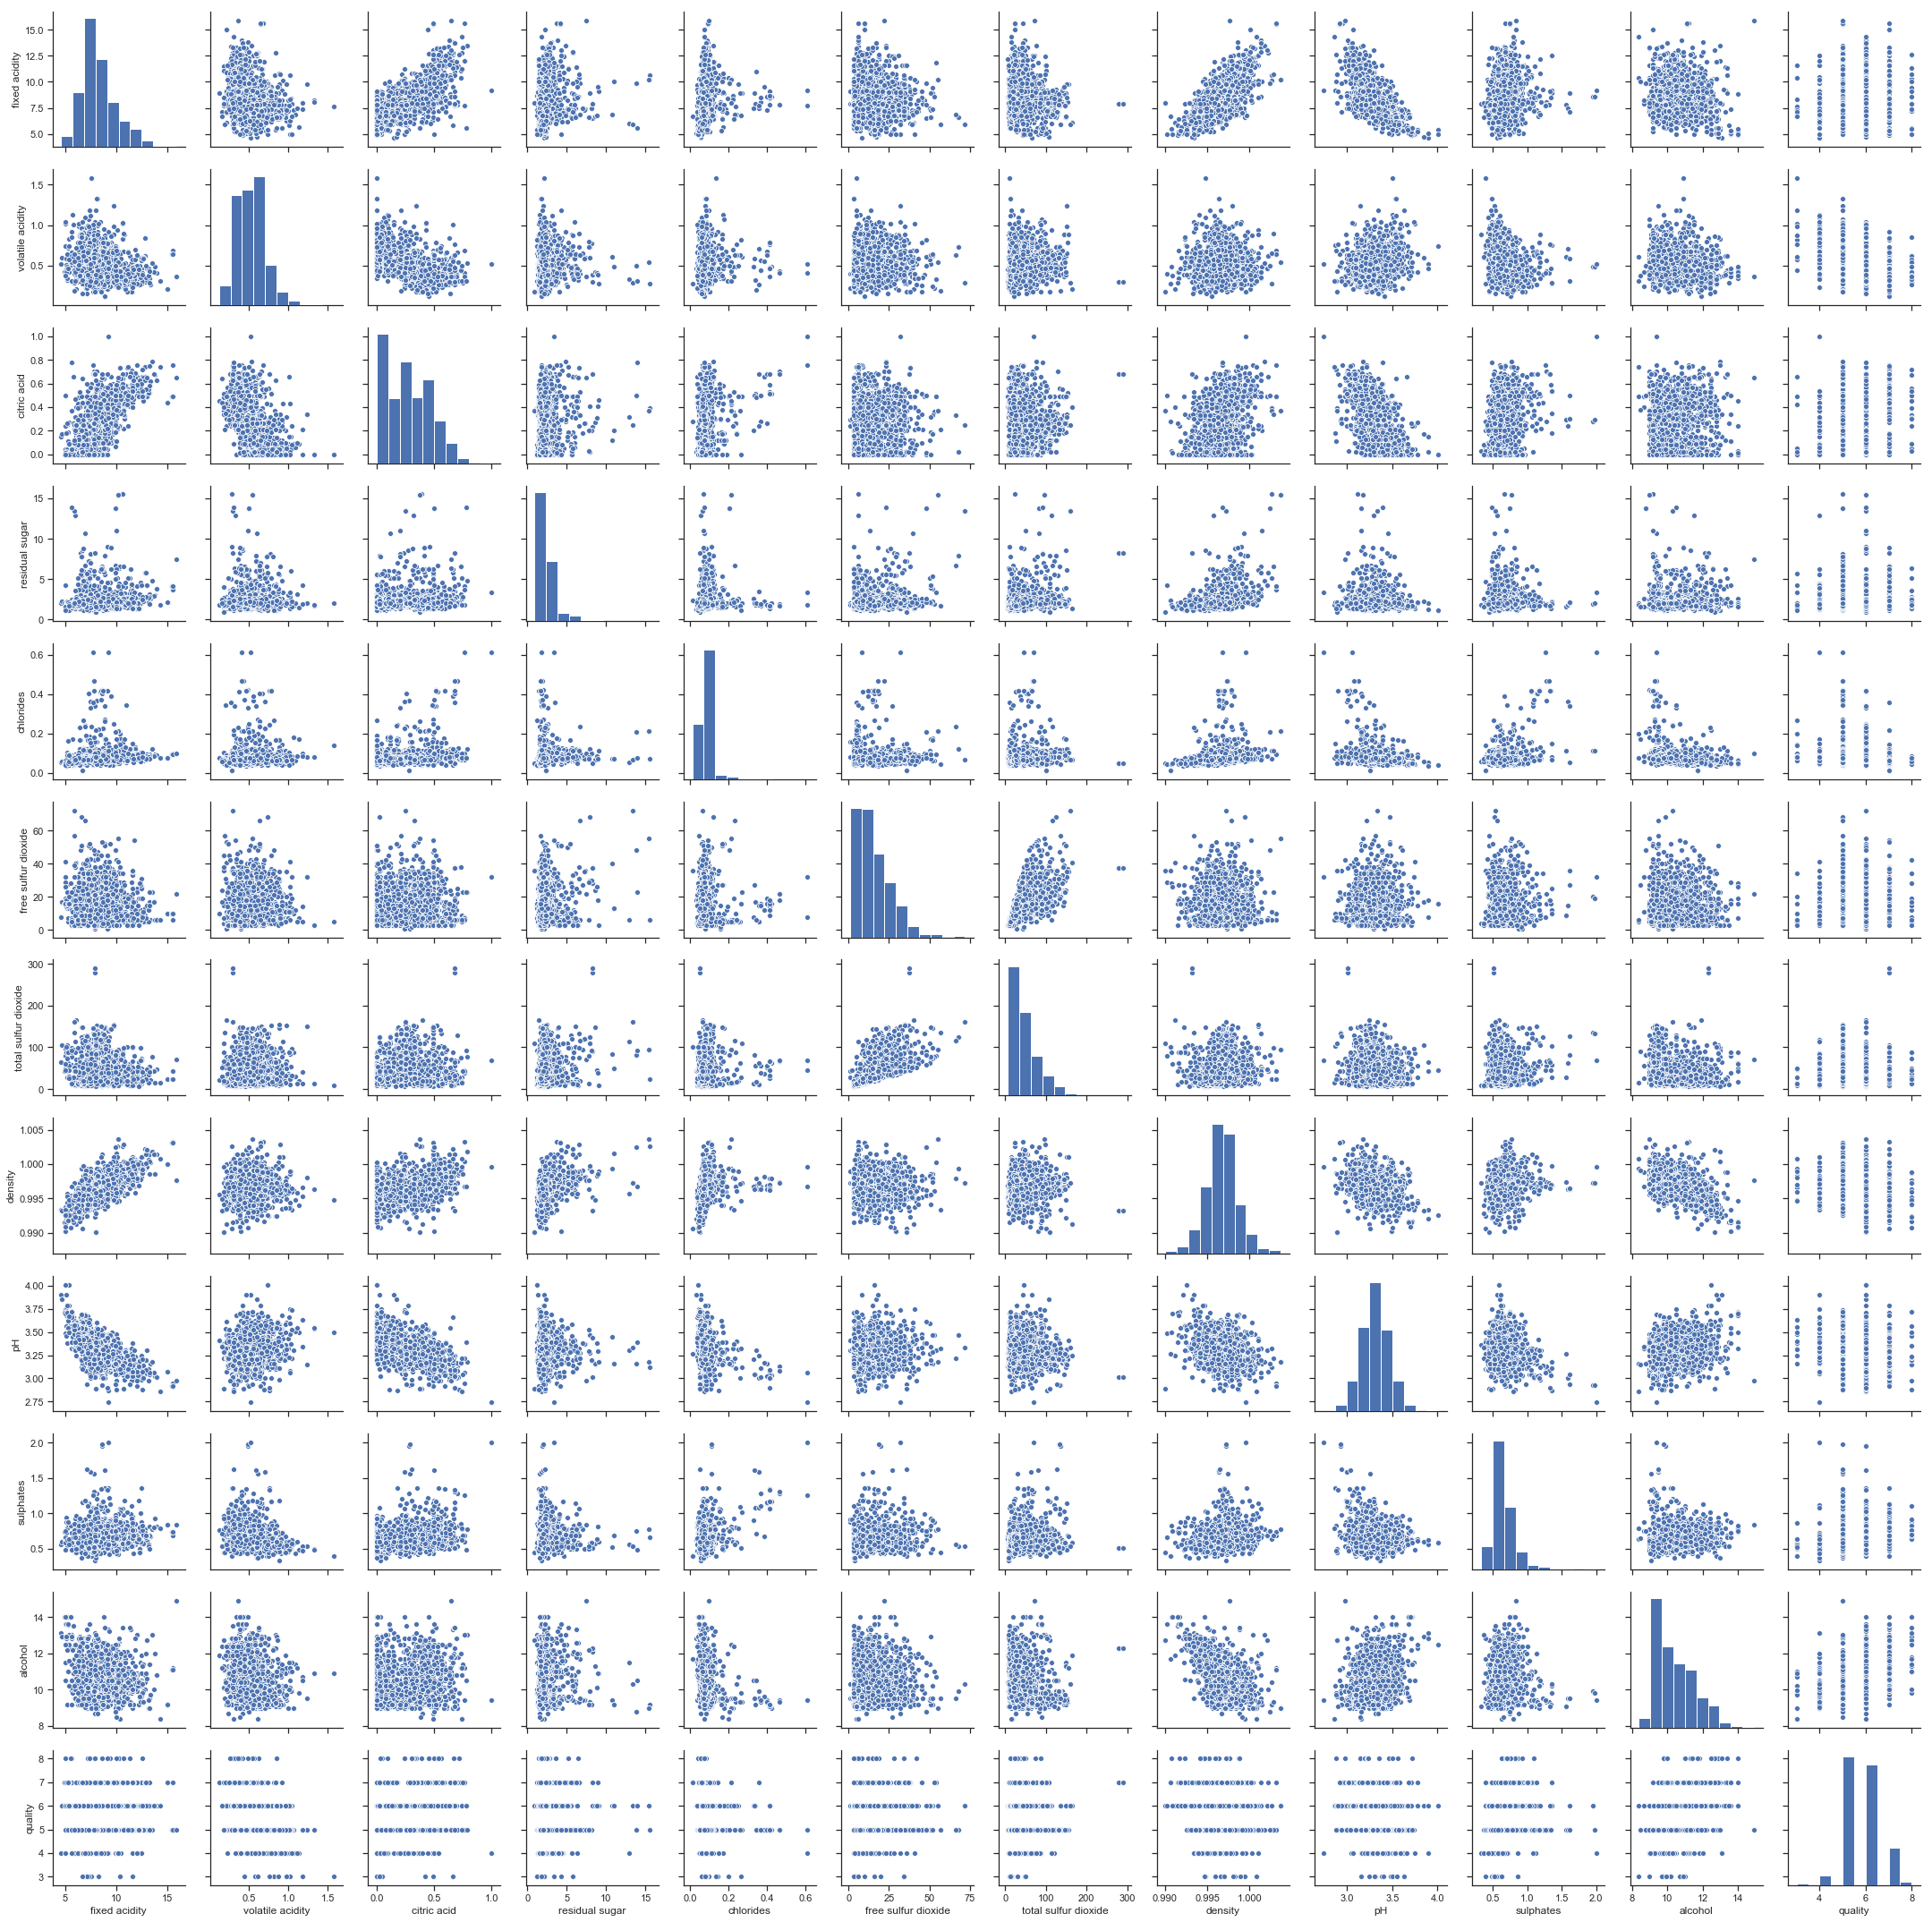

In [9]:
plt.figure(figsize=(20,16))
sns.set(style="ticks")
sns.pairplot(df)

_Todas las varibales presentan outliers, sin embargo hay algunas en que estos valores atipicos se presentan con mayor fuerza, estas son las relacionadas con: residual sugar, chlorides y sulphates._

_Se presenta una fuerte relación lineal positiva entre fixed acidity-citric acid, fixed acidity-density y density-citric acid_

_Se presenta una fuerte relacion lineal negativa entre: ph-fixed acidity, density-alcohol, citric acid-ph, citric acid-volatile acidity_

## Ejercicio 3: Regularización de modelos

* Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV . Para cada uno de ellos implemente los siguientes pasos:
    * Entrene los modelos con 10 validaciones cruzadas.
    * Extraiga los coeficientes estimados, el mejor valor alpha, MAE            (median_absolute_error ) y RMSE ( mean_squared_error ) asociado a cada modelo.
    * En base a la información solicitada, responda lo siguiente:
    * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
    * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [10]:
# Normalizamos la variable quality (se estandariza para tener la misma escala de datos)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# df_scaled['quality'] = np.log(df['quality'])# sobreescribimos el precio como logaritmo

In [11]:
# X será nuestro conjunto de atributos, y será nuestra variable objetivo
X = df_scaled.loc[:,'fixed acidity':'alcohol'] # Tomamos todas las columnas menos quality

N = X.shape[0] # guardamos el número de filas (datos de entrenamiento)

X.insert(X.shape[1], 'intercept', np.ones(N))#incorporamos un intercepto

y = df_scaled['quality'] # asignamos como target la variable 'quality'

#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 23748)

# definimos un alphas
alphas = np.logspace(0, 7, base=10)

## Modelo Ridge

In [12]:
# Entrenamos el modelo con 10 validaciones cruzadas
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(X_train, y_train)

In [13]:
# mejor hiperparametro
hiper_ridge = model_ridge.alpha_
hiper_ridge

10.0

## Modelo Lasso

In [14]:
lasso_cv = LassoCV(cv = 10)
model_lasso = lasso_cv.fit(X_train, y_train)

In [15]:
hiper_lasso = model_lasso.alpha_
hiper_lasso

0.003914474084971191

## Modelo Elastic Net

In [16]:
elastic_cv = ElasticNetCV(cv=10)
model_elastic_net = elastic_cv.fit(X_train, y_train)

In [17]:
hiper_elastic_net = model_elastic_net.alpha_
hiper_elastic_net

0.008394724505446923

## Métricas de desempeño

In [18]:
#  R2
print('R2 Ridge      :', r2_score(y_test, model_ridge.predict(X_test)))
print('R2 Lasso      :', r2_score(y_test, model_lasso.predict(X_test)))
print('R2 Elatic Net :', r2_score(y_test, model_elastic_net.predict(X_test)))

R2 Ridge      : 0.39206751743999413
R2 Lasso      : 0.3928835350710286
R2 Elatic Net : 0.3927078197703583


In [20]:
# MSE
print('MSE Ridge       :', mean_squared_error(model_ridge.predict(X_test), y_test))
print('MSE Lasso       :', mean_squared_error(model_lasso.predict(X_test), y_test))
print('MSE Elastic Net :', mean_squared_error(model_elastic_net.predict(X_test), y_test))

MSE Ridge       : 0.641375685179764
MSE Lasso       : 0.6405147772956852
MSE Elastic Net : 0.6407001589368987


In [21]:
# MAE
print('MAE Ridge       :', median_absolute_error(model_ridge.predict(X_test), y_test))
print('MAE Lasso       :', median_absolute_error(model_lasso.predict(X_test), y_test))
print('MAE Elastic Net :', median_absolute_error(model_elastic_net.predict(X_test), y_test))

MAE Ridge       : 0.4834064700364123
MAE Lasso       : 0.4739945900236134
MAE Elastic Net : 0.4731449528159048


## Coeficientes

In [22]:
print('Coeficientes Ridge:','\n', model_ridge.coef_, '\n')
print('Coeficientes Lasso:', '\n', model_lasso.coef_, '\n')
print('Coeficientes Elastic Net:', '\n', model_elastic_net.coef_)

Coeficientes Ridge: 
 [-0.00389307 -0.2370799  -0.05142311  0.06489367 -0.10568532  0.03090599
 -0.13015809 -0.02485584 -0.09902642  0.20287985  0.35154245  0.        ] 

Coeficientes Lasso: 
 [-0.         -0.23561265 -0.04559808  0.05872191 -0.09913602  0.02223947
 -0.11911109 -0.01987577 -0.08806416  0.19760973  0.35451719  0.        ] 

Coeficientes Elastic Net: 
 [-0.         -0.23354115 -0.04162281  0.05845996 -0.0985271   0.02125417
 -0.11809337 -0.02143914 -0.08561056  0.19655293  0.35180091  0.        ]


In [23]:
#concatenamos para visualizar mejor

s1= pd.DataFrame(model_ridge.coef_)
s2= pd.DataFrame(model_lasso.coef_)
s3= pd.DataFrame(model_elastic_net.coef_)

df_new=pd.concat([s1,s2,s3],axis=1)

In [24]:
# Renombramos las columnas y filas 
df_new.columns= ['Ridge', 'Lasso', 'Elastic Net']
df_new.index=[df.columns]
df_new

,Ridge,Lasso,Elastic Net
fixed acidity,-0.003893,-0.000000,-0.000000
volatile acidity,-0.237080,-0.235613,-0.233541
citric acid,-0.051423,-0.045598,-0.041623
residual sugar,0.064894,0.058722,0.058460
chlorides,-0.105685,-0.099136,-0.098527
free sulfur dioxide,0.030906,0.022239,0.021254
total sulfur dioxide,-0.130158,-0.119111,-0.118093
density,-0.024856,-0.019876,-0.021439
pH,-0.099026,-0.088064,-0.085611
sulphates,0.202880,0.197610,0.196553


__¿Qué modelo presenta un mejor desempeño en base a las métricas?__

_La métricas de desempeño de los tres modelos son bastante similares, sin embargo el __modelo lasso__ es el mejor ya que presenta el r2 mas alto y el error medio cuadrado es mas pequeño_. 

__¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?__

_Los atributos que tienen un comportamiento similar a lo largo de cada modelo son: volatile acidity y alcohol_ 



